# NLP project

In [1]:
%pip install datasets
%pip install latex2sympy2-extended
#%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == 

In [2]:
from datasets import load_dataset
from functools import lru_cache
from latex2sympy2_extended import latex2sympy
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sympy import Basic
from sympy.parsing.latex import parse_latex

from transformers import AutoTokenizer, AutoModel
from typing import List, Tuple
import logging
import matplotlib.pyplot as plt
import numpy as np
#import optuna
import pandas as pd
import random
import re
import sympy
import torch
from collections import Counter

In [3]:
# Set random seed for reproducibility
seed = 42

# Python's built-in random module
random.seed(seed)

# NumPy
np.random.seed(seed)

# PyTorch
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Optuna
#optuna.logging.set_verbosity(optuna.logging.WARNING)  # Optional: Reduce verbosity

# Scikit-learn
# No explicit seed setting, but you can pass `random_state=seed` to functions like train_test_split, StratifiedKFold, etc.

# Matplotlib
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)  # Optional: Consistent colors

In [4]:
#from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("zwhe99/DeepMath-103K")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00010.parquet:   0%|          | 0.00/217M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00001-of-00010.parquet:   0%|          | 0.00/212M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00002-of-00010.parquet:   0%|          | 0.00/214M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00003-of-00010.parquet:   0%|          | 0.00/208M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00004-of-00010.parquet:   0%|          | 0.00/207M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00005-of-00010.parquet:   0%|          | 0.00/208M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00006-of-00010.parquet:   0%|          | 0.00/207M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00007-of-00010.parquet:   0%|          | 0.00/208M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00008-of-00010.parquet:   0%|          | 0.00/274M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00009-of-00010.parquet:   0%|          | 0.00/181M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/103110 [00:00<?, ? examples/s]

In [5]:
train_ds = ds['train']
print(train_ds)

Dataset({
    features: ['question', 'final_answer', 'difficulty', 'topic', 'r1_solution_1', 'r1_solution_2', 'r1_solution_3'],
    num_rows: 103110
})


In [6]:
train_ds_qs = train_ds['question']
train_ds_tp = train_ds['topic']
train_ds_diff = train_ds['difficulty']

In [ ]:
NUM_SAMPLES = 1000
random_indices = random.sample(range(len(train_ds['question'])), NUM_SAMPLES if NUM_SAMPLES != float('inf') else len(train_ds['question']))

In [ ]:
train_ds_qs = train_ds['question']
train_ds_tp = train_ds['topic']
train_ds_diff = train_ds['difficulty']
reason_1_ds = train_ds['r1_solution_1']
reason_2_ds = train_ds['r1_solution_2']
reason_3_ds = train_ds['r1_solution_3']
answer = train_ds['final_answer']

# Preliminary tasks

## Briefly describe the data

In [ ]:
print("Number of samples:", train_ds.num_rows)
print("Number of topics:", len(set(train_ds_tp)))
print("Number of different difficulties:", len(set(train_ds_diff)))

Number of samples: 103110
Number of topics: 82
Number of different difficulties: 20


In [ ]:
label_counts = Counter(train_ds_tp)
label_counts

Counter({'Mathematics -> Precalculus -> Limits': 7409,
         'Mathematics -> Differential Equations -> Ordinary Differential Equations (ODEs)': 1044,
         'Mathematics -> Applied Mathematics -> Statistics -> Probability -> Counting Methods -> Combinations': 1313,
         'Mathematics -> Calculus -> Integral Calculus -> Applications of Integrals': 4747,
         'Mathematics -> Algebra -> Intermediate Algebra -> Other': 2958,
         'Mathematics -> Geometry -> Plane Geometry -> Polygons': 1114,
         'Mathematics -> Algebra -> Intermediate Algebra -> Exponential Functions': 1861,
         'Mathematics -> Applied Mathematics -> Statistics -> Probability -> Other': 4269,
         'Mathematics -> Algebra -> Algebra -> Polynomial Operations': 3000,
         'Mathematics -> Algebra -> Abstract Algebra -> Field Theory': 2778,
         'Mathematics -> Algebra -> Linear Algebra -> Linear Transformations': 1379,
         'Mathematics -> Differential Equations -> Partial Differential

In [ ]:
labels = pd.Series(train_ds_tp)
general_labels = labels.str.split("->").str[1].str.strip()
general_labels.value_counts()

,count
Algebra,32800
Calculus,28283
Precalculus,9033
Geometry,8426
Applied Mathematics,7846
Number Theory,5843
Discrete Mathematics,5820
Other,3483
Differential Equations,1576


In [ ]:
counts=Counter(train_ds_diff)
sorted_by_key = sorted(counts.items(), key=lambda x: x[0])
for k, v in sorted_by_key:
    print(f"{k}: {v}")

-1.0: 4
1.0: 15
1.5: 39
2.0: 123
2.5: 146
3.0: 3142
3.5: 990
4.0: 5466
4.5: 4391
5.0: 16358
5.5: 14806
6.0: 17488
6.5: 7750
7.0: 8561
7.5: 6746
8.0: 11686
8.5: 3989
9.0: 1356
9.5: 51
10.0: 3


## Parsing

### Notes
- [x] Questions have different latex sytanx (`[`, `(`, `$`)
- [x] How do we parse the latex formula?
  - [x] `hybrid-math` with word lenght tokens
  - [x] `tree-walk` where latex qs are transfromed symbolically
- [] How do we tokenize questions?
  - [x] pretrained tokenizers from hf
  - [] https://github.com/google/sentencepiece

We remove those with freq < 2 as those will break stratify during train test split

In [ ]:
train_ds_qs = np.array(train_ds_qs)
train_ds_qs = train_ds_qs[random_indices]

train_ds_tp = np.array(train_ds_tp)
train_ds_tp = train_ds_tp[random_indices]

reason_1_ds = np.array(reason_1_ds)
reason_1_ds = reason_1_ds[random_indices]

reason_2_ds = np.array(reason_2_ds)
reason_2_ds = reason_2_ds[random_indices]

reason_3_ds = np.array(reason_3_ds)
reason_3_ds = reason_3_ds[random_indices]

In [ ]:
label_counts = Counter(train_ds_tp)
valid_labels = {label for label, count in label_counts.items() if count > 1}

filtered_indices = [i for i, label in enumerate(train_ds_tp) if label in valid_labels]
train_ds_qs = train_ds_qs[filtered_indices]
train_ds_tp = train_ds_tp[filtered_indices]
reason_1_ds = reason_1_ds[filtered_indices]
reason_2_ds = reason_2_ds[filtered_indices]
reason_3_ds = reason_3_ds[filtered_indices]

### Initial investigation on sympy

In [ ]:

def extract_latex_bracket_content(text):
    patterns = [
        r'\\\[(.*?)\\\]',  # \[ ... \]
        r'\\\((.*?)\\\)',  # \( ... \)
        r'\$(.*?)\$',       # $ ... $
    ]
    # Combine patterns into one
    combined_pattern = '|'.join(patterns)
    #matches = [m for m in re.findall(combined_pattern, text, flags=re.DOTALL)]
    #formulas = [next(filter(None, tup)) for tup in matches]
    matches = [m for m in re.findall(combined_pattern, text, flags=re.DOTALL)]
    formulas = []
    for tup in matches:
        non_empty = list(filter(None, tup))
        if non_empty:
            formulas.append(non_empty[0])
    # Use a counter to number the placeholders
    def replacer(match, counter=[1]):
        placeholder = "{" + str(counter[0]-1) + "}"
        counter[0] += 1
        return placeholder
    new_text = re.sub(combined_pattern, replacer, text)
    return new_text, formulas

parsed_indices = []
parsed_text = []
parsed_formulas = []
for i in range(len(train_ds_qs)):
    d = train_ds_qs[i]
    #print("original input:", d)
    text, formulas = extract_latex_bracket_content(d)
    #print("parsed text: ", text, "\nequations: ", formulas)
    formulas_sympy = []
    num_parsed = 0
    for expr in formulas:
        try:
            parsed = parse_latex(expr)
            formulas_sympy.append(parsed)
            num_parsed += 1
        except Exception as e:
            pass
            #print("Could not parse:", e)
            #print(parsed)
    if num_parsed == len(formulas):
        parsed_indices.append(i)
        parsed_text.append(text)
        parsed_formulas.append(formulas_sympy)
print("correctly parsed", len(parsed_indices), "inputs over", len(train_ds_qs))

### Tokenizers

ADD DESCRIPTION

In [7]:
class BaseStrat:
    def __init__(self):
        pass

    def run(self) -> Tuple[bool, List[str]]:
        pass

class TreeWalkStrat(BaseStrat):
    def __init__(self):
        pass

    def run(self, text):
        def print_sympy_tree(expr, indent=0):
            print('  ' * indent + str(expr.func))
            for arg in expr.args:
                print_sympy_tree(arg, indent + 1)

        # --- Parse LaTeX into sympy then walk the expression tree ---
        def flatten_sympy_expr(expr: Basic):
            tokens = []

            def walk(node):
                if isinstance(node, Basic):
                    args_len = len(node.args)
                    args = node.args
                    # If only 1 we build the output as operator + walk(operand)
                    if args_len == 1:
                        if isinstance(node, (sympy.Symbol, sympy.Integer, sympy.Rational, sympy.Float)):
                            tokens.append(str(node))
                        else:
                            tokens.append(node.func.__name__)
                        walk(args[0])
                    # If only 2 we build the output with inorder visit walk(operand0) + operator + walk(operand1)
                    elif args_len == 2:
                        walk(args[0])
                        if isinstance(node, (sympy.Symbol, sympy.Integer, sympy.Rational, sympy.Float)):
                            tokens.append(str(node))
                        else:
                            tokens.append(node.func.__name__)
                        walk(args[1])
                    # If no operands are found we just add self
                    elif args_len == 0:
                        if isinstance(node, (sympy.Symbol, sympy.Integer, sympy.Rational, sympy.Float)):
                            tokens.append(str(node))
                        else:
                            tokens.append(node.func.__name__)
                    # If there are multiple operands (> 2) we add them all after the operator
                    else:
                        if isinstance(node, (sympy.Limit, sympy.Integral)):
                            args = reversed(args)
                        if isinstance(node, (sympy.Symbol, sympy.Integer, sympy.Rational, sympy.Float)):
                            tokens.append(str(node))
                        else:
                            tokens.append(node.func.__name__)
                        for arg in args:
                            walk(arg)
                else:
                    raise RuntimeError("not sympy Basic object")

            walk(expr)
            return tokens

        # --- Main tokenization function ---
        def tokenize(text):
            math_pattern = r'(\$\$.*?\$\$|\$.*?\$|\\\[.*?\\\]|\\\(.*?\\\))'
            parts = re.split(math_pattern, text, flags=re.DOTALL)

            final_tokens = []
            is_erorr = False
            for part in parts:
                if re.match(math_pattern, part, flags=re.DOTALL):
                    # Clean math delimiters
                    clean = re.sub(r'^(\$+|\\\[|\\\(|\\])|(\$+|\\\]|\\\))$', '', part.strip())
                    try:
                        parsed = parse_latex(clean)
                        math_tokens = flatten_sympy_expr(parsed)
                        final_tokens.extend(math_tokens)
                    except Exception as e:
                        #is_erorr = True
                        final_tokens.extend(clean.split(' '))
                else:
                    final_tokens.extend(re.findall(r'\b\w+\b', part))
            return is_erorr, final_tokens

        return tokenize(text)

class  HybridMathTokenizerStrat(BaseStrat):
    def __init__(self):
        super().__init__()

    def run(self, text):
        # -----------------------------------------------------------------------------
        #  Regex & cleaning helpers
        # -----------------------------------------------------------------------------
        _MATH_ENV_RE = re.compile(
            r"\$\$(.*?)\$\$"                    # $$...$$
            r"|\\\[(.*?)\\\]"                   # \[...\]
            r"|\\\((.*?)\\\)"                   # \(...\)
            r"|\$(.*?)\$"                           # $...$
            r"|\\begin\{(equation\*?|align\*?|multline)\}(.*?)\\end\{\1\}",
            re.DOTALL,
        )

        _CLEAN_REPLACES = [
            (r"\\displaystyle", ""),
            (r"\\left|\\right", ""),           # sizing commands
            (r"\\[ ,;!]", ""),                 # spacing commands
        ]

        _WORD_RE = re.compile(r"\w+|[^\w\s]", re.UNICODE)


        def clean_latex(latex: str) -> str:
            for pat, rep in _CLEAN_REPLACES:
                latex = re.sub(pat, rep, latex)
            return re.sub(r"\s+", " ", latex).strip()


        def extract_math_spans(text: str) -> Tuple[str, List[str]]:
            spans: List[str] = []
            def _repl(m: re.Match) -> str:
                latex = next(g for g in m.groups() if g is not None)
                idx = len(spans)
                spans.append(latex)
                return f"[[MATH{idx}]]"
            return _MATH_ENV_RE.sub(_repl, text), spans


        def flatten_sympy_expr(expr: sp.Basic) -> List[str]:
            if expr.is_Atom:
                return [str(expr)]
            toks = [expr.func.__name__]
            for arg in expr.args:
                toks.extend(flatten_sympy_expr(arg))
            return toks

        # -----------------------------------------------------------------------------
        #  LaTeX → tokens converter
        # -----------------------------------------------------------------------------
        @lru_cache(maxsize=200_000)
        def tokenize_math(latex: str) -> Tuple[bool, List[str]]:
            latex = clean_latex(latex)
            if len(latex) > 500 or latex.count("{") > 25:
                return False, latex.split()

            try:
                expr = latex2sympy(latex, dummy_symbol_func=lambda n: sp.Symbol(n))
                return False, flatten_sympy_expr(expr)
            except Exception as exc:
                logging.debug("[tokenize_math] fallback on `%s` (%s)", latex, exc)
                # fallback but treat as no error
                return False, latex.split()

        # -----------------------------------------------------------------------------
        #  Plain-text and hybrid tokenizers
        # -----------------------------------------------------------------------------

        def text_tokenize(text: str) -> List[str]:
            return _WORD_RE.findall(text)


        def tokenize(text: str) -> Tuple[bool, List[str]]:
            cleaned, spans = extract_math_spans(text)
            parts = re.split(r"(\[\[MATH\d+\]\])", cleaned)

            tokens: List[str] = []
            had_error = False

            for part in parts:
                m = re.fullmatch(r"\[\[MATH(\d+)\]\]", part)
                if m:
                    idx = int(m.group(1))
                    err, mtoks = tokenize_math(spans[idx])
                    had_error |= err
                    tokens.extend(mtoks)
                    continue

                raw = text_tokenize(part)
                i = 0
                while i < len(raw):
                    if raw[i].startswith("\\"):
                        depth = raw[i].count("{") - raw[i].count("}")
                        j = i + 1
                        while j < len(raw) and depth > 0:
                            depth += raw[j].count("{") - raw[j].count("}")
                            j += 1
                        latex_inline = " ".join(raw[i:j])
                        err, mtoks = tokenize_math(latex_inline)
                        had_error |= err
                        tokens.extend(mtoks)
                        i = j
                    else:
                        tokens.append(raw[i])
                        i += 1
            return had_error, tokens
        return tokenize(text)

class PassThroughStrat(BaseStrat):
    def __init__(self):
        super().__init__()

    def run(self, text):
        return True, [text]

# TODO: add embeddings support
class Tokenizer:
    def __init__(self, strat: str, tokenizer: str):
        self.strat_dict = {
            'tree-walk': TreeWalkStrat,
            'hybrid-math':  HybridMathTokenizerStrat,
            'pass-through': PassThroughStrat
        }
        self.strat = self.strat_dict[strat]()
        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer)

    def __call__(self, *args, **kwds):
        parsed = self.parse(*args)
        return self.tokenizer.encode(" ".join(parsed))

    def parse(self, *args, **kwds):
        error, res = self.strat.run(*args)
        if error:
            raise RuntimeError(error)
        return res


## Perform cluster analysis on questions field

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict


In [96]:
n = 3000  # number of samples per general topic
topic_samples = defaultdict(list)

# Stream through the dataset
for row in ds['train']:
    full_topic = row['topic']
    try:
        general_topic = full_topic.split("->")[1].strip()
    except IndexError:
        continue  # skip malformed labels

    if len(topic_samples[general_topic]) < n:
        topic_samples[general_topic].append(row)

# Flatten samples
flat_rows = [item for sublist in topic_samples.values() for item in sublist]

# Extract questions and their general topics
train_clust = pd.Series([row['question'] for row in flat_rows])
labels_clust = pd.Series([row['topic'].split("->")[1].strip() for row in flat_rows])

print(train_clust.shape)
print(labels_clust.value_counts())


(25576,)
Precalculus               3000
Applied Mathematics       3000
Calculus                  3000
Algebra                   3000
Geometry                  3000
Other                     3000
Number Theory             3000
Discrete Mathematics      3000
Differential Equations    1576
Name: count, dtype: int64


In [26]:
# Vectorize the text (n=1000)
tokenizer = Tokenizer('tree-walk', "allenai/longformer-base-4096")
vectorizer = TfidfVectorizer(tokenizer=tokenizer.parse, lowercase=True, token_pattern=None, max_df=0.9, min_df=5, stop_words='english')
X_vec = vectorizer.fit_transform(train_clust)

print(X_vec.shape)

(9000, 2715)


In [28]:
vocab = vectorizer.get_feature_names_out()

print(f"Length of vocabulary: {len(vocab)}")

vocab[:100]

Length of vocabulary: 2715


array(['', '\n', '\n\\lim_{n', '&', '&=', '(', '(-1)^n', '(-1,', '(-1,1)',
       '(0,', '(0,0)', '(0,0)}', '(0,0,1)', '(0,1)', '(0,1]', '(0,2)',
       '(0,\\infty)', '(1', '(1,', '(1,0)', '(1,1)', '(1,2)', '(2,',
       '(\\cos', '(\\mathbb{r},', '(\\omega,', '(\\sin', '(a', '(a,',
       '(a_1,', '(c[0,1],', '(f_n)', '(m,', '(n,', '(n-1)', '(p,', '(v,',
       '(x', '(x(t),', '(x)', '(x,', '(x,d)', '(x,y)', '(x,y,z)', '(x^2',
       '(x^3', '(x_0,', '(x_1,', '(x_n)', '(y', "(y')^2", ')', '*', '+',
       '+\\infty', '+\\infty}', ',', '-', '-1', '-1)', '-1,', '-2', '-3',
       '-4', '-\\frac{1}{2}', '-\\infty', '-\\infty}', '-a', '-i', '-x',
       '-y', '.', '/', '0', '0)', '0,', '0.', '0.5', '000', '01', '0\\}',
       '0]', '0^+}', '0^-}', '0^{+}}', '0}', '1', '1)', "1)y''", '1,',
       '1.', '1/2', '10', '100', '1000', '101', '10\\}', '11', '12',
       '120'], dtype=object)

In [22]:
print(X_vec[0])
print(train_clust[0])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (1, 2715)>
  Coords	Values
  (0, 1274)	0.21938944529735152
  (0, 1667)	0.2144151856786722
  (0, 0)	0.2360840502722501
  (0, 453)	0.3217348961846213
  (0, 627)	0.2137328181018509
  (0, 386)	0.28370583314684295
  (0, 585)	0.5568501877574199
  (0, 426)	0.36393744562555713
  (0, 57)	0.21047702873236554
  (0, 563)	0.36557008134335084
Evaluate the limit: \[ \lim_{x \to \infty} \sqrt{x} \left( \sqrt[3]{x+1} - \sqrt[3]{x-1} \right) \]


### Kmeans

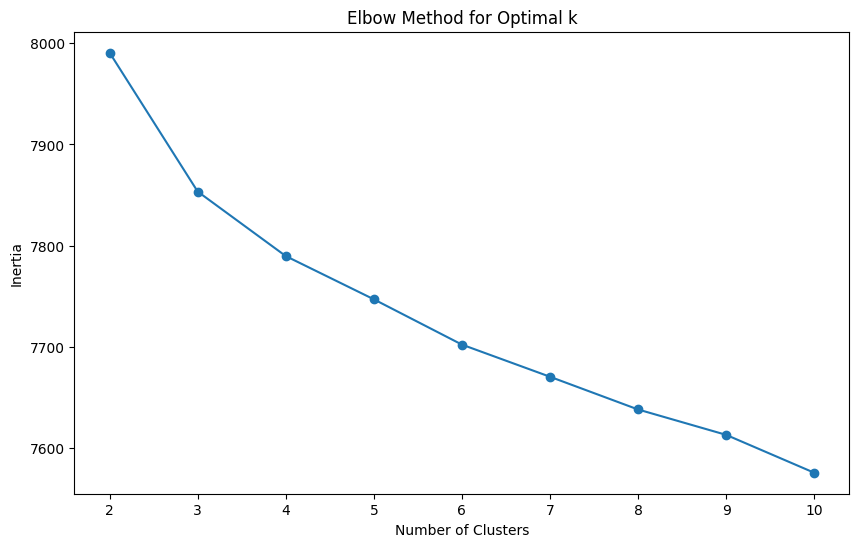

In [29]:
# 1. Determining the optimal number of clusters (Elbow Method)
inertia = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_vec)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

**Silhouette Score**: This metric measures how well each data point fits into its assigned cluster compared to other clusters. It ranges from -1 to 1, where a higher score indicates better-defined clusters.

Optimal number of clusters based on silhouette score: 2


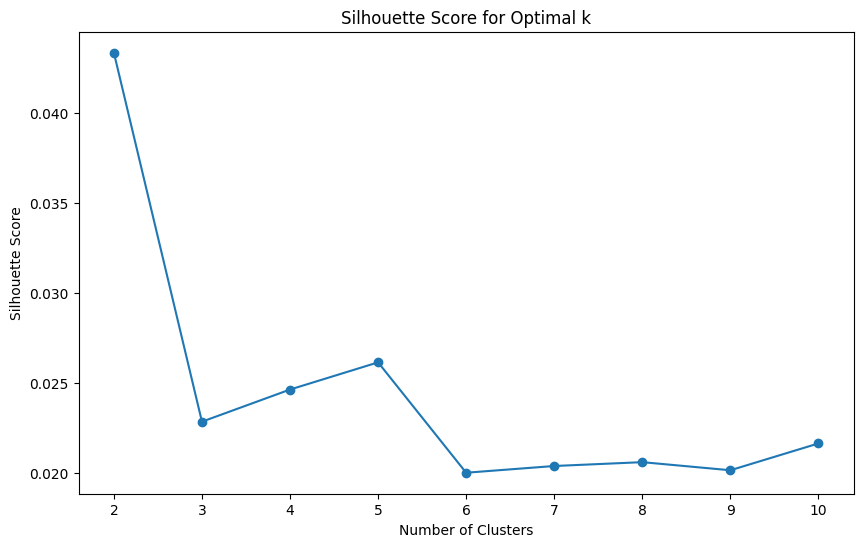

In [30]:
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_vec)
    silhouette_avg = silhouette_score(X_vec, cluster_labels)
    silhouette_scores.append(silhouette_avg)

best_k_silhouette = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {best_k_silhouette}")

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [31]:
n_clusters = 3 # from elbow

# 2. Applying the K-Means algorithm
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_vec)

In [32]:
# 3. Investigating the clusters

print("Top terms per cluster:")
vocab = vectorizer.get_feature_names_out()

for i in range(kmeans.n_clusters):
    centroid = kmeans.cluster_centers_[i]
    sorted_terms = centroid.argsort()[::-1]
    print(f"Cluster {i}:\t{[vocab[j] for j in sorted_terms[:10]]}")

Top terms per cluster:
Cluster 0:	['', 'limit', 'evaluate', '\\to', '\\infty}', '\\lim_{x', '\\lim_{n', '0}', '\\lim_{x\\to', 'calculate']
Cluster 1:	['', '=', '+', '0', 'x', 'function', 'determine', 'n', '-', '1']
Cluster 2:	['=', '+', 'x', 'determine', '', 'number', 'let', '1', 'n', '0']


- Cluster 0:
 This cluster strongly suggests questions related to calculus, specifically focusing on limits. The terms "limit," "evaluate," \to (approaches), \infty} (infinity), and the limit notations \\lim_{x and \\lim_{n are clear indicators. The presence of '0' and 'calculate' further supports this, as limits often involve approaching zero or requiring calculation.
- Cluster 1:
 This cluster appears to capture more general algebra and functions. The presence of '=', '+', '0', 'x', '-' are fundamental to algebraic expressions and equations.
- Cluster 2:
 This cluster also seems to represent general algebra and number-related questions, but with a slightly different emphasis than Cluster 1.

In [34]:
print('Number of docs in: ')

for i in range(kmeans.n_clusters):
    print(f"Cluster {i}: {np.sum(kmeans.labels_ == i)}")

Number of docs in: 
Cluster 0: 821
Cluster 1: 2816
Cluster 2: 5363


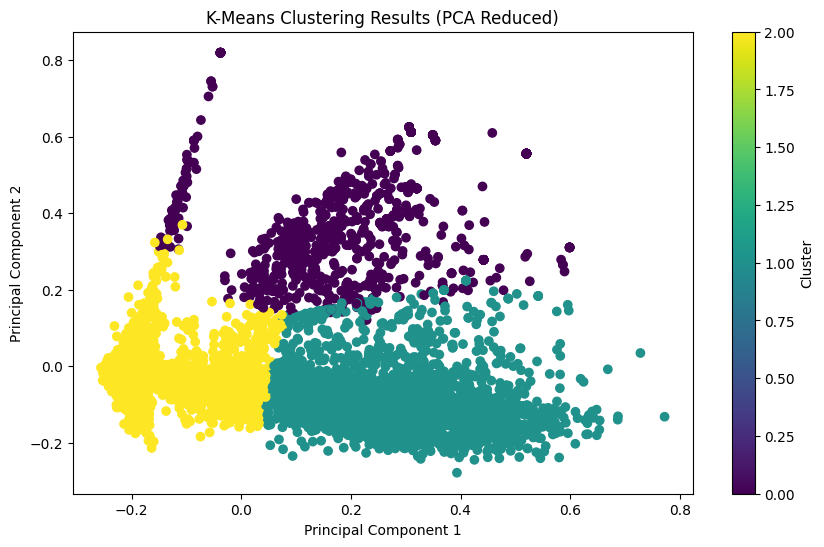

In [33]:
# 4. Visualizing the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_features2d = pca.fit_transform(X_vec.toarray())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_features2d[:, 0], reduced_features2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

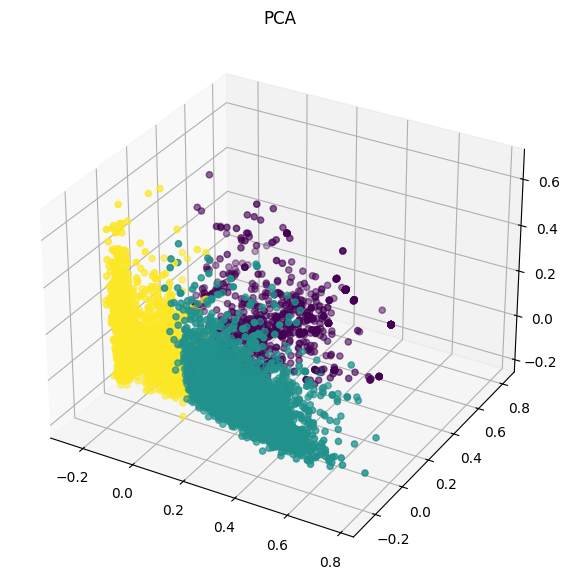

In [37]:
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(X_vec.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=cluster_labels, cmap='viridis')
plt.title('PCA')
plt.show()

### DBSCAN

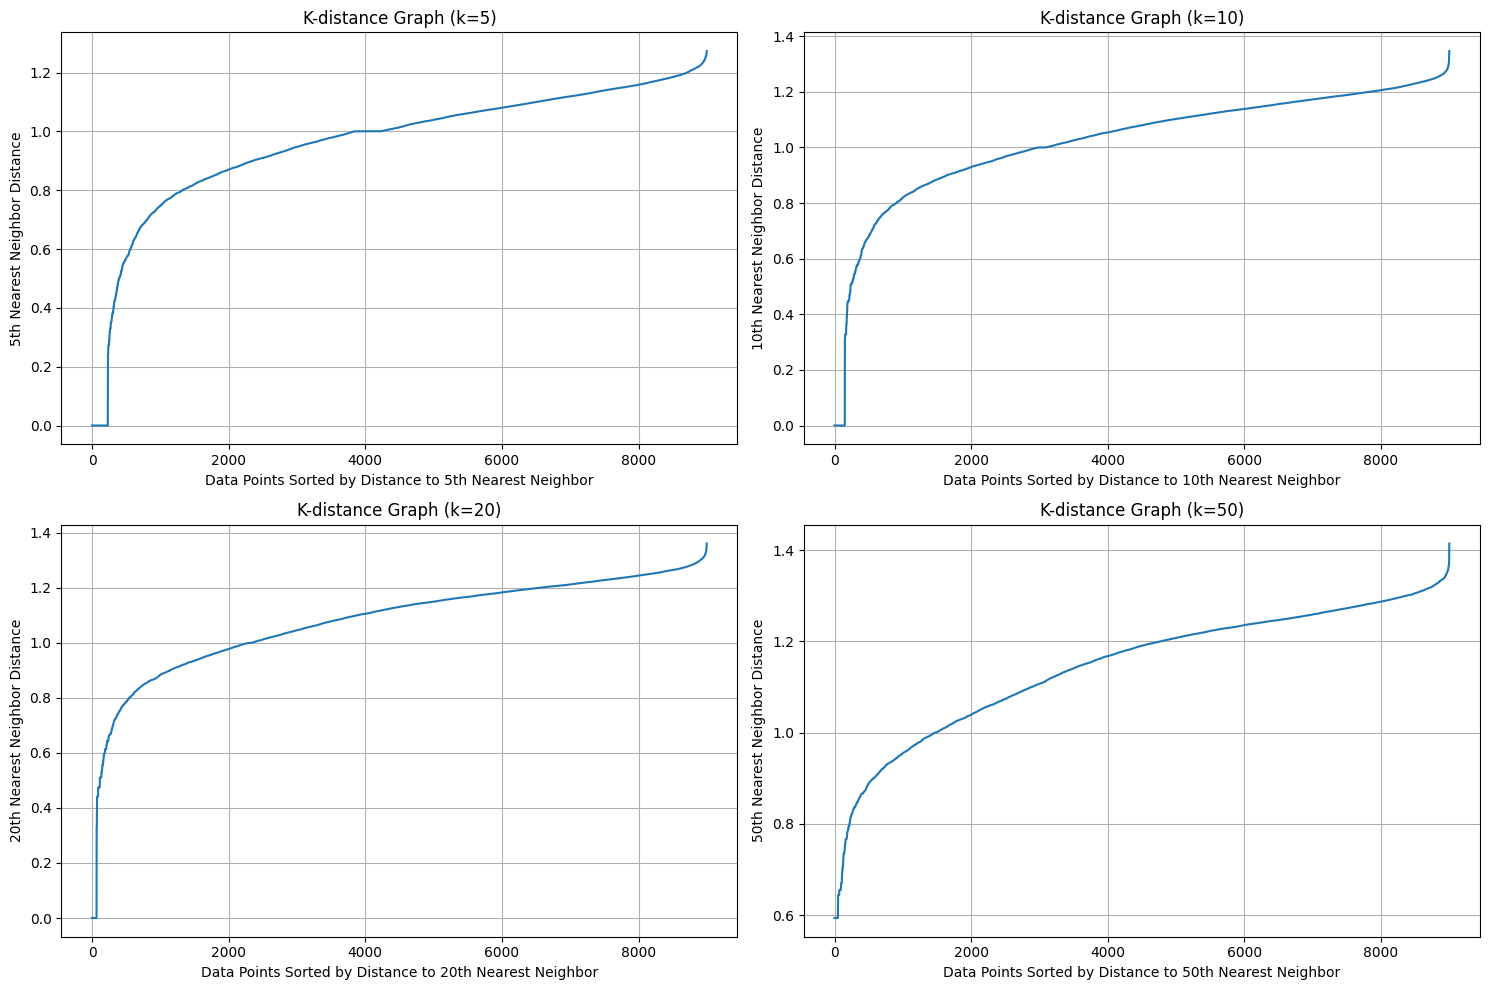

In [41]:
# 1. Parameter Optimization for 'eps' using k-distance graphs for different 'k'
n_neighbors_values = [5, 10, 20, 50]
plt.figure(figsize=(15, 10))

for i, n_neighbors_value in enumerate(n_neighbors_values):
    neighbors = NearestNeighbors(n_neighbors=n_neighbors_value)
    neighbors_fit = neighbors.fit(X_vec)
    distances, indices = neighbors_fit.kneighbors(X_vec)
    distances = np.sort(distances, axis=0)
    distances = distances[:, n_neighbors_value - 1]
    plt.subplot(2, 2, i + 1)
    plt.plot(distances)
    plt.title(f'K-distance Graph (k={n_neighbors_value})')
    plt.xlabel('Data Points Sorted by Distance to {}th Nearest Neighbor'.format(n_neighbors_value))
    plt.ylabel(f'{n_neighbors_value}th Nearest Neighbor Distance')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [48]:
# Based on the k-distance graphs, choose a few potential 'eps' values to test
potential_eps_values = np.linspace(0.7, 0.95, 10)
min_samples_values = [5, 10, 15]
results = []

for eps in potential_eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_vec)
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)

        silhouette_avg = -1
        if n_clusters > 1 and n_noise < len(cluster_labels)*0.8:
            silhouette_avg = silhouette_score(X_vec[cluster_labels != -1], cluster_labels[cluster_labels != -1])

        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette_score': silhouette_avg
        })

results_df = pd.DataFrame(results)
print("\nComparison of DBSCAN results for different parameters:")
print(results_df.sort_values(by='silhouette_score', ascending=False))


Comparison of DBSCAN results for different parameters:
         eps  min_samples  n_clusters  n_noise  silhouette_score
20  0.866667           15           3     6910          0.088616
23  0.894444           15           4     6515          0.058737
26  0.922222           15           3     6080          0.057328
22  0.894444           10           8     6279          0.049793
29  0.950000           15           2     5678          0.048898
28  0.950000           10           5     5407          0.047655
25  0.922222           10           7     5831          0.035171
16  0.838889           10           7     7036          0.033320
19  0.866667           10           9     6656          0.032116
12  0.811111            5          36     6950          0.028663
24  0.922222            5          25     5396          0.022960
27  0.950000            5          26     4932          0.021025
18  0.866667            5          29     6231          0.010072
15  0.838889            5         

In [49]:
# Extract the parameters with the highest Silhouette Score
best_result = results_df.sort_values(by='silhouette_score', ascending=False).iloc[0]

best_eps = best_result['eps']
best_min_samples = int(best_result['min_samples'])
best_silhouette_score = best_result['silhouette_score']
best_n_clusters = best_result['n_clusters']
best_n_noise = best_result['n_noise']

print("\nBest DBSCAN parameters based on Silhouette Score:")
print(f"  eps: {best_eps}")
print(f"  min_samples: {best_min_samples}")
print(f"  Silhouette Score: {best_silhouette_score:.4f}")
print(f"  Number of Clusters: {best_n_clusters}")
print(f"  Number of Noise Points: {best_n_noise}")


Best DBSCAN parameters based on Silhouette Score:
  eps: 0.8666666666666666
  min_samples: 15.0
  Silhouette Score: 0.0886
  Number of Clusters: 3.0
  Number of Noise Points: 6910.0


In [52]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan.fit_predict(X_vec)

In [53]:
print("Top terms per DBSCAN cluster (excluding noise):")
#vocab = vectorizer.get_feature_names_out()

for label in range(max(labels_dbscan)+1):
    # Get indices of data points belonging to the current cluster
    cluster_indices = np.where(labels_dbscan == label)[0]
    cluster_samples = X_vec[cluster_indices]

    if cluster_samples.shape[0] > 0:
        # Calculate the mean TF-IDF vector for the cluster
        mean_tfidf = np.array(cluster_samples.mean(axis=0))[0]

        # Sort terms by their mean TF-IDF score in descending order
        sorted_indices = np.argsort(mean_tfidf)[::-1]
        top_terms = [vocab[i] for i in sorted_indices[:10]]
        print(f"Cluster {label}:\t{top_terms}")
    else:
        print(f"Cluster {label}:\t(empty)")

# Analyze noise points (label -1) if present
if -1 in labels_dbscan:
    noise_indices = np.where(labels_dbscan == -1)[0]
    print(f"\nNumber of noise points: {len(noise_indices)}")
    print("Example noise points:",)
    maxind = min(10,len(noise_indices))
    for idx in range(maxind):
        print(f"  {idx}: {train_clust[idx]}")

Top terms per DBSCAN cluster (excluding noise):
Cluster 0:	['', 'limit', 'evaluate', '\\to', '+', '=', '\\infty}', '\\lim_{x', '-', 'calculate']
Cluster 1:	['&', '\\\\', '', '0', '1', 'matrix', '\\end{pmatrix}', 'state', '2', '\\begin{pmatrix}']
Cluster 2:	['convergence', 'radius', 'series', '', '\\sum_{n=0}^{\\infty}', 'power', 'determine', 'z^n', '\\sum_{n=1}^\\infty', 'representation']

Number of noise points: 6910
Example noise points:
  0: Evaluate the limit: \[ \lim_{x \to \infty} \sqrt{x} \left( \sqrt[3]{x+1} - \sqrt[3]{x-1} \right) \]
  1: Evaluate the limit: \[ \lim_{x \to 0} \left(\dfrac{1}{\tan^2 x}-\dfrac{1}{x^2} \right) \]
  2: Find the limit: \[ \lim_{x \to \infty} (x!)^{1/x} \]
  3: Evaluate the limit: \[ \lim_{n \to \infty} \frac{\sum_{k=1}^n k^p}{n^{p+1}} \]
  4: Evaluate the limit: \[ \lim_{t\to 0}\left(\frac{1}{\ln(1 + t)}+\frac{1}{\ln(1-t)}\right). \]
  5: Evaluate the limit: \[ \lim_{x\to 0}\left(\log\frac{1}{x}\right)^x \]
  6: Compute the limit \( \lim_{n\to\inft

- Cluster 0:
 This cluster strongly suggests questions related to *calculus*, specifically dealing with limits and evaluation. The presence of \to (arrow for limits), \infty} (infinity), and \\lim_{x (limit as x approaches something) reinforces this. The mathematical symbols +, =, and - are common but appear in this context of evaluation.

- Cluster 1:
This cluster seems to be capturing questions involving *linear algebra*, specifically matrices. The terms matrix, \\begin{pmatrix}, and \\end{pmatrix} are clear indicators of matrix notation. The word 'state' might suggest questions related to state vectors or state-space representations in a linear algebra context.

- Cluster 2:
 This cluster clearly focuses on analysis, specifically the topic of *series and sequences*, particularly their convergence and radius of convergence. The summation notations \\sum_{n=0}^{\\infty} and \\sum_{n=1}^\\infty, along with z^n (often seen in power series), are strong indicators.

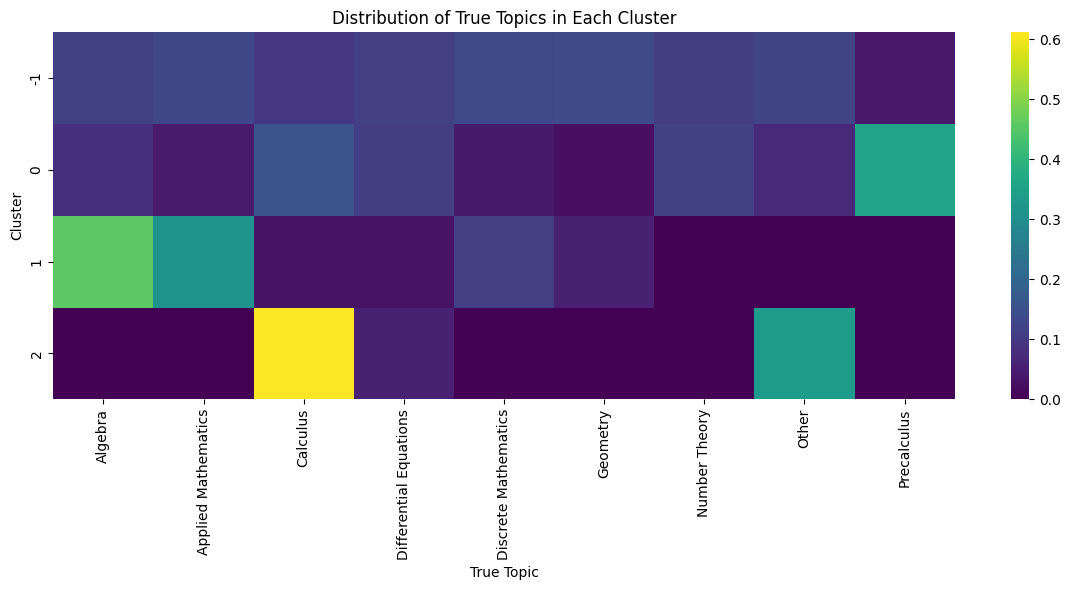

In [55]:
import seaborn as sns

# Create a DataFrame to tabulate results
df_vis = pd.DataFrame({
    'Cluster': labels_dbscan,
    'Topic': labels_clust
})

# Filter out noise if using DBSCAN (-1 means noise)
#df_vis = df_vis[df_vis['Cluster'] != -1]

# Create a contingency table (Cluster x Topic)
cluster_topic_counts = pd.crosstab(df_vis['Cluster'], df_vis['Topic'])

# Normalize rows for proportion visualization
cluster_topic_props = cluster_topic_counts.div(cluster_topic_counts.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_topic_props, annot=False, cmap="viridis", cbar=True)
plt.title("Distribution of True Topics in Each Cluster")
plt.xlabel("True Topic")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


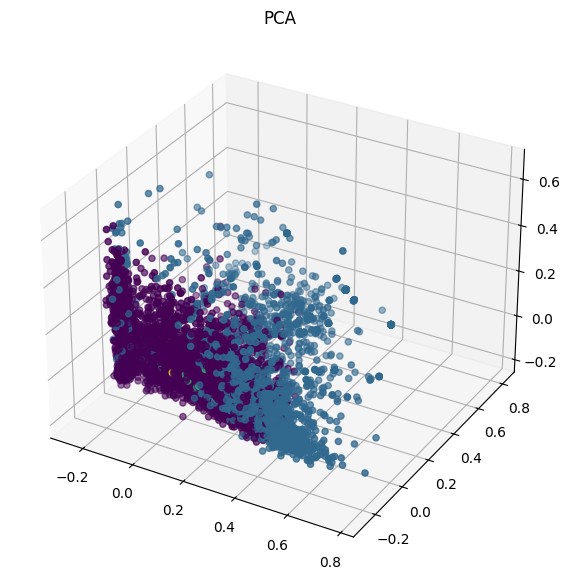

In [63]:
#pca = PCA(n_components=3)
#reduced_features = pca.fit_transform(X_vec.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=labels_dbscan, cmap='viridis')
plt.title('PCA')
plt.show()

### Hierarchical clustering

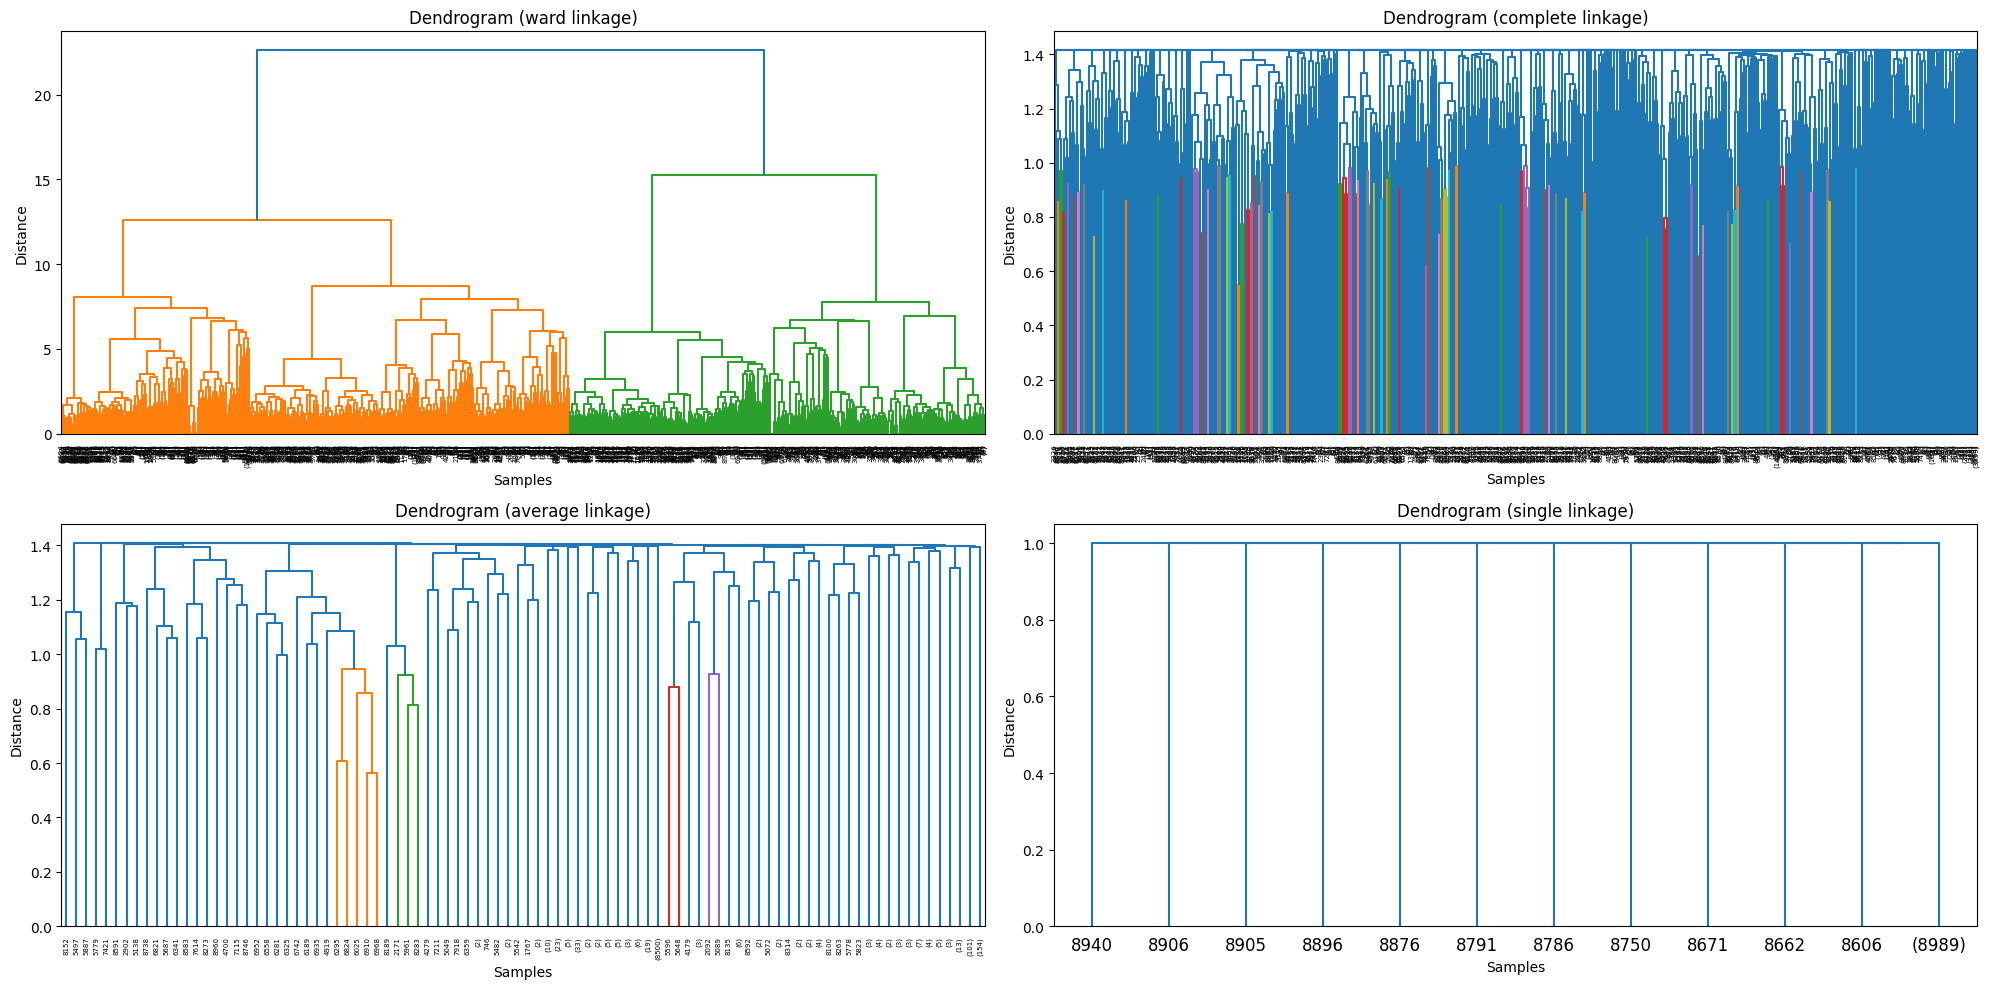

In [57]:
# Linkage methods to compare
methods = ['ward', 'complete', 'average','single']

# Plot each dendrogram
plt.figure(figsize=(20, 10))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i + 1)
    linked = linkage(X_vec.toarray(), method=method)
    dendrogram(linked, truncate_mode='level', p=10)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


In [59]:
# Fit Agglomerative Clustering with Ward linkage
n_clusters = 2
model_hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_hierarchical = model_hierarchical.fit_predict(X_vec.toarray())

df = pd.DataFrame({
    'cluster': labels_hierarchical,  # Clustering results
    'topic': labels_clust            # Topic labels
})

# Create a pivot table to visualize the distribution of topics across clusters
topic_distribution = pd.crosstab(df['cluster'], df['topic'], rownames=['Cluster'], colnames=['Topic'])
print(topic_distribution)

Topic    Algebra  Applied Mathematics  Calculus  Differential Equations  \
Cluster                                                                   
0            169                  159       323                     282   
1            831                  841       677                     718   

Topic    Discrete Mathematics  Geometry  Number Theory  Other  Precalculus  
Cluster                                                                     
0                         138        89            180    205          721  
1                         862       911            820    795          279  


In [60]:
print("Top terms per hierarchical clusters:")
#vocab = vectorizer.get_feature_names_out()

for label in range(max(labels_hierarchical)+1):
    # Get indices of data points belonging to the current cluster
    cluster_indices = np.where(labels_hierarchical == label)[0]
    cluster_samples = X_vec[cluster_indices]

    if cluster_samples.shape[0] > 0:
        # Calculate the mean TF-IDF vector for the cluster
        mean_tfidf = np.array(cluster_samples.mean(axis=0))[0]

        # Sort terms by their mean TF-IDF score in descending order
        sorted_indices = np.argsort(mean_tfidf)[::-1]
        top_terms = [vocab[i] for i in sorted_indices[:10]]
        print(f"Cluster {label}:\t{top_terms}")
    else:
        print(f"Cluster {label}:\t(empty)")

Top terms per hierarchical clusters:
Cluster 0:	['', 'limit', 'evaluate', '\\to', '=', '+', '\\infty}', '\\lim_{x', '-', '\\lim_{n']
Cluster 1:	['', '=', '+', 'x', 'determine', '1', 'number', '0', 'n', '-']


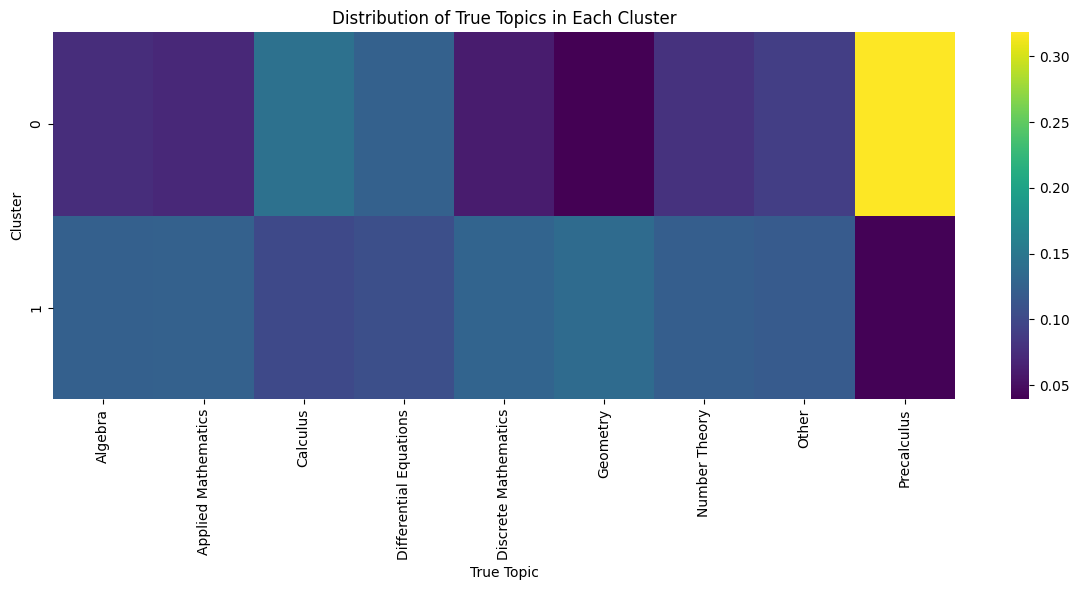

In [61]:
#import seaborn as sns
df_vis = pd.DataFrame({
    'Cluster': labels_hierarchical,
    'Topic': labels_clust
})

# Create a contingency table (Cluster x Topic)
cluster_topic_counts = pd.crosstab(df_vis['Cluster'], df_vis['Topic'])

# Normalize rows for proportion visualization
cluster_topic_props = cluster_topic_counts.div(cluster_topic_counts.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_topic_props, annot=False, cmap="viridis", cbar=True)
plt.title("Distribution of True Topics in Each Cluster")
plt.xlabel("True Topic")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


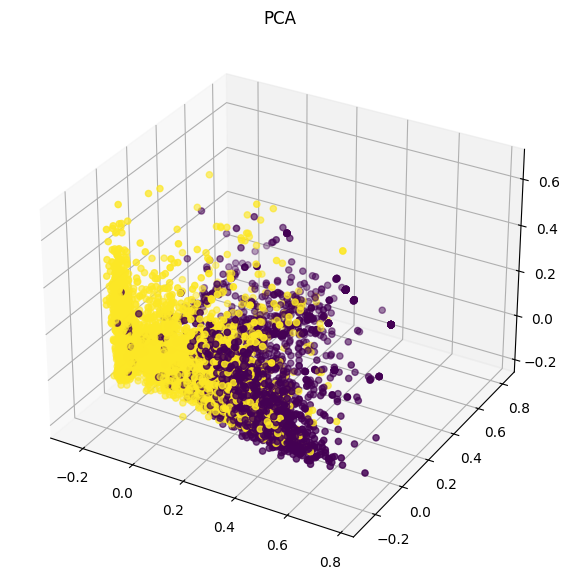

In [62]:
#pca = PCA(n_components=3)
#reduced_features = pca.fit_transform(X_vec.toarray())

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=labels_hierarchical, cmap='viridis')
plt.title('PCA')
plt.show()

### LDA

- Topic Modeling: each document belongs to many clusters at the same time and it is represented as a mixture of those clusters (refered to as topics).
- LDA learns a low dimensional representation of the documents.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer #need this one for LDA

In [97]:
tokenizer = Tokenizer('tree-walk', "allenai/longformer-base-4096")
vectorizer_count = CountVectorizer(tokenizer=tokenizer.parse, lowercase=True, token_pattern=None, stop_words='english', min_df=5, max_df=.5)
vector_documents = vectorizer_count.fit_transform(train_clust)

vocab = vectorizer_count.get_feature_names_out()
print("Vocab length:", len(vocab))

Vocab length: 5321


In [98]:
lda = LatentDirichletAllocation(n_components=5, verbose=1, learning_method='online', max_iter=30)
lda.fit(vector_documents)

iteration: 1 of max_iter: 30
iteration: 2 of max_iter: 30
iteration: 3 of max_iter: 30
iteration: 4 of max_iter: 30
iteration: 5 of max_iter: 30
iteration: 6 of max_iter: 30
iteration: 7 of max_iter: 30
iteration: 8 of max_iter: 30
iteration: 9 of max_iter: 30
iteration: 10 of max_iter: 30
iteration: 11 of max_iter: 30
iteration: 12 of max_iter: 30
iteration: 13 of max_iter: 30
iteration: 14 of max_iter: 30
iteration: 15 of max_iter: 30
iteration: 16 of max_iter: 30
iteration: 17 of max_iter: 30
iteration: 18 of max_iter: 30
iteration: 19 of max_iter: 30
iteration: 20 of max_iter: 30
iteration: 21 of max_iter: 30
iteration: 22 of max_iter: 30
iteration: 23 of max_iter: 30
iteration: 24 of max_iter: 30
iteration: 25 of max_iter: 30
iteration: 26 of max_iter: 30
iteration: 27 of max_iter: 30
iteration: 28 of max_iter: 30
iteration: 29 of max_iter: 30
iteration: 30 of max_iter: 30


LatentDirichletAllocation(learning_method='online', max_iter=30, n_components=5,
                          verbose=1)

In [99]:
# Most important terms for each topic (n=3000)
for i in range(len(lda.components_)):
    sorted_terms = lda.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(vocab[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [determine, let, x, set, \in, space, answer, m, f, b]
Topic 2:	 [, n, limit, evaluate, +, \to, number, -, numbers, determine]
Topic 3:	 [=, +, x, 0, y, 1, -, given, equation, &]
Topic 4:	 [, =, \in, function, 0, determine, \mathbb{r}, \,, integral, \times]
Topic 5:	 [s, number, probability, using, random, 1, calculate, given, 2, series]


0. This topic seems very general and foundational. It includes common words used in problem statements (determine, let, answer) along with basic mathematical notation (x, set, \in, often indicating "element of"), the abstract concept of "space," and generic variables (m, f, b). It might represent the core vocabulary present across many different types of mathematical questions.

1. This topic appears to be a blend of calculus and general numerical concepts. "limit" and "evaluate" strongly suggest calculus, while "number," "numbers," "+" and "-" are broadly applicable. The presence of a comma as a top term is unusual and might indicate how mathematical notation was processed. The arrow \to is common in limits and function definitions.

2. This topic clearly points towards basic algebra and equations. The prominent symbols (=, +, x, 0, y, 1, -) and the word "equation" are strong indicators. "Given" is common in problem statements, and "&" might be a leftover from notation.

3. This topic is a mix of fundamental mathematical concepts and calculus. The presence of "=", "∈", "function," "r" (real numbers), and "×" are quite general. However, "integral" strongly suggests calculus. The comma and the backslash with a space (\,) are likely artifacts of notation processing.

4. This topic seems to focus on probability and sequences/series. "probability," "random," and "calculate" are key terms for probability. "number," "1," "2," and "series" suggest sequences and series in analysis. "Using" and "given" are general problem-solving words, and 's' is a common variable.

In [95]:
# Most important terms for each topic (n=2000)
for i in range(len(lda.components_)):
    sorted_terms = lda.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(vocab[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [number, n, 1, &, determine, integer, p, numbers, 0, prime]
Topic 2:	 [=, x, +, \in, 0, determine, function, 1, y, -]
Topic 3:	 [integral, point, determine, given, points, circle, 4, line, vertices, h]
Topic 4:	 [, limit, evaluate, +, \to, =, -, \infty}, \,, calculate]
Topic 5:	 [let, set, space, determine, answer, m, does, g, random, consider]


Topic 1: Still heavily focused on number theory. The presence of "number," "n," "1," "integer," "p" (often used for primes), "numbers," "0," and "prime" strongly suggests this. The "&" might be a leftover from mathematical notation.

Topic 2: Remains quite general algebra, but with a stronger emphasis on equations and functions. The presence of "=", "x," "+," "∈," "0," "determine," "function," "1," "y," and "-" points to basic algebraic manipulations and function definitions.

Topic 3: Now seems to be a blend of geometry and some algebra/calculus. "Integral" and "point" are present, along with geometric terms like "circle," "line," and "vertices." The number "4" and variable "h" are less clearly tied but might appear in specific geometric or calculus problems. "Determine" and "given" are still common.

Topic 4: Continues to be strongly related to limits and evaluation, likely from calculus. The top words are very similar to the previous Topic 2 in the fewer-document scenario, with "limit," "evaluate," "+," "→," "=", "-," "∞}," and "calculate" being prominent. The comma and backslash are still present, likely due to notation handling.

Topic 5: This topic remains the most general and abstract. "Let," "set," "space," "determine," "answer," "m," "does," "g," "random," and "consider" are all high-frequency words that can appear across various mathematical domains. The inclusion of "random" might suggest some probability questions are also captured here, but it's not the primary focus.

In [85]:
# Most important terms for each topic (n=1000)
for i in range(len(lda.components_)):
    sorted_terms = lda.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(vocab[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [\in, x, let, =, determine, set, f, m, space, does]
Topic 2:	 [, =, limit, evaluate, \to, -, \,, \infty}, function, n]
Topic 3:	 [=, 0, +, x, 1, equation, -, <, y, given]
Topic 4:	 [+, =, s, z, c, point, b, -, given, points]
Topic 5:	 [number, n, determine, 1, probability, integer, random, 2, given, 3]


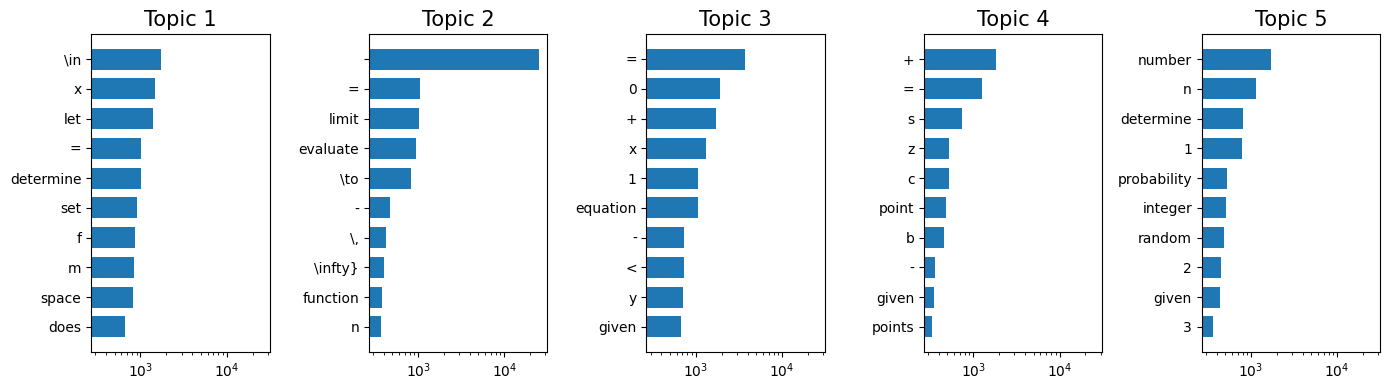

In [86]:
num_words = 10
cols = 5
rows = int(len(lda.components_)/5)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_terms_index = topic.argsort()[:-num_words - 1:-1]
    top_terms = [vocab[i] for i in top_terms_index]
    weights = topic[top_terms_index]
    ax = axes[topic_idx]
    ax.barh(top_terms, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 15})
    ax.invert_yaxis()
    ax.set_xscale('log')

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.tight_layout()
plt.show()

- Topic 0: Seems very general and fundamental. It includes basic mathematical symbols (∈, =, let), variables (x, f, m), and common words ("determine," "set," "space," "does"). This could represent the core vocabulary present in many mathematical questions, regardless of the specific topic.

- Topic 1: Clearly related to calculus and analysis. The top words include "limit," "evaluate," → (arrow for limits or functions), infinity (∞}), and function-related terms. The presence of commas and hyphens might be due to how mathematical notation was processed.

- Topic 2: Focuses on algebraic equations and inequalities. We see the equals sign, zero, plus and minus, variables (x, y), constants (1), and the word "equation." The less than sign (<) also points to inequalities. "Given" is a common word in problem statements.

- Topic 3: Appears to be a mix of symbols and geometric concepts. We have equals and plus/minus signs, along with variables (s, z, c, b) and the word "point" and its plural "points." This could be related to coordinate geometry or vector geometry.

- Topic 4: Seems to be about number theory and probability. It includes "number," the variable n (often used for integers), "determine," constants (1, 2, 3), "probability," "integer," and "random."

In [88]:
# Analyse one document in particular
doc = train_clust[1160]
print(doc)

doc_vec = vectorizer.transform([doc])[0]
topic_vec = lda.transform(doc_vec)[0]
topic_vec

Solve the differential equation \(( D^4 + 6 D^3 + 9 D^2) y=0\), where \(D = \frac{d}{dx}\), with the initial conditions \(x=0,  y=0,  y'=0,  y''= 6\), and the asymptotic condition that as \(x\) tends to \(+\infty\), \(y'\) tends to \(1\). Find the value of \(y\) when \(x = 1\).


array([0.04316148, 0.16938761, 0.63182108, 0.00633695, 0.14929288])

In [90]:
sorted_topics = topic_vec.argsort()[::-1]
sorted_prevalence = sorted(topic_vec)[::-1]

# Relevance and top terms for the question for each topic
for i in range(10):
    if sorted_prevalence[i] < .01: break
    topic = sorted_topics[i]
    sorted_terms = np.flip(lda.components_[topic].argsort())
    print (f'{100 * sorted_prevalence[i]:.1f}% Topic {topic}: {" ".join(vocab[i] for i in sorted_terms[:10])}')

63.2% Topic 2: = 0 + x 1 equation - < y given
16.9% Topic 1:  = limit evaluate \to - \, \infty} function n
14.9% Topic 4: number n determine 1 probability integer random 2 given 3
4.3% Topic 0: \in x let = determine set f m space does


#### 30 components

In [69]:
# Most important terms for each topic (for 30 components)
for i in range(len(lda.components_)):
    sorted_terms = lda.components_[i].argsort()[::-1]
    concatenated_terms = '[' + ', '.join(vocab[i] for i in sorted_terms[:10]) + ']'
    print (f'Topic {i + 1}:\t', concatenated_terms)

Topic 1:	 [problem, \quad, respect, process, b), basis, functional, infinitely, maximal, y_1]
Topic 2:	 [size, ring, x}, exponential, \{0,, arithmetic, theory, sample, remaining, language]
Topic 3:	 [x, f, let, space, function, &, \in, y, \mathbb{r}, set]
Topic 4:	 [time, length, distance, 100, probability, contains, times, expected, required, consecutive]
Topic 5:	 [graph, element, edges, given, chromatic, divisors, \otimes, graphs, placed, maps]
Topic 6:	 [random, probability, variables, distributed, expected, game, joint, coin, 2^n, heads]
Topic 7:	 [number, positive, \times, complex, \ldots,, real, complete, |z|, 1, path]
Topic 8:	 [=, given, area, 1,, w, 0,, points, (x,, 2,, distribution]
Topic 9:	 [ways, \mod, generating, rank, complement, polynomials, black, students, hypothesis, string]
Topic 10:	 [r, order, use, second, assume, unique, independent, form, coordinates, linear]
Topic 11:	 [line, circle, y), necessarily, partial, expressed, consider, intersects, \frac{\partial, ad

- *Some Topics Seem Coherent:* Several topics appear to capture specific areas or types of mathematical questions. For example:

Topic 4: Seems related to probability and expected values, possibly involving time, length, or distance.

Topic 6: Clearly about probability with random variables, distributions, and games.

Topic 7: Involves numbers (positive, real, complex), magnitudes (|z|), and potentially paths.

Topic 10: Suggests linear algebra or related concepts (linear, order, rank, independent, coordinates).

Topic 26: Looks like vector calculus (integral, surface, normal, sphere, vector field).

Topic 29: Appears to be about equations, especially differential equations.

Topic 30: Seems to focus on series and sequences, convergence, and power series.

- *Some Topics are More General or Abstract:*

Topic 3: Very general mathematical symbols and terms (x, f, let, space, function, set). It might represent a very common vocabulary across many types of questions.

Topic 19: Primarily mathematical symbols and basic quantifiers.
Some Topics are Less Clear or Mixed:

Topic 1: Contains "problem" and "functional" but also seemingly unrelated words.

Topic 2: A mix of "ring" (algebra), "exponential," "arithmetic," "theory," and "language."

Topic 5: Combines graph theory ("graph," "edges," "vertex") with algebraic terms ("element," "divisors").

Topic 8: A mix of equality, area, points in coordinates, and distribution.

Topic 9: Contains algebraic ("polynomials," "rank"), combinatorial ("ways," "black," "white"), and number theory ("mod") elements.

Topic 11: Geometry ("line," "circle," "intersects") mixed with calculus notation.

Topic 12: About logical statements ("determine," "true," "false," "exists") and general elements.

Topic 13: Combines group theory with geometry/combinatorics ("volume," "segment," "colors," "permutations").

Topic 16: A mix of graph theory ("vertex," "walk"), number theory ("primes"), and potentially combinatorics ("cards").

Topic 18: General terms ("provide," "answer," "point," "plane") and function notation.

Topic 20: Combines linear algebra ("matrix"), calculus ("tangent"), geometry ("ratio"), and function notation.

Topic 21: Seems related to probability/combinatorics with discrete objects ("subsets," "coins," "die").

Topic 22: A mix of calculus ("limit," "integral"), algebra ("degree"), and general terms.

Topics 14, 15, 17, 23, 24, 25, 27, 28: These seem to contain a mix of specific mathematical symbols, constants, and potentially related concepts, but might be less clearly defined. For example, Topics 23 and 24 seem to be heavily influenced by numbers and basic operators.

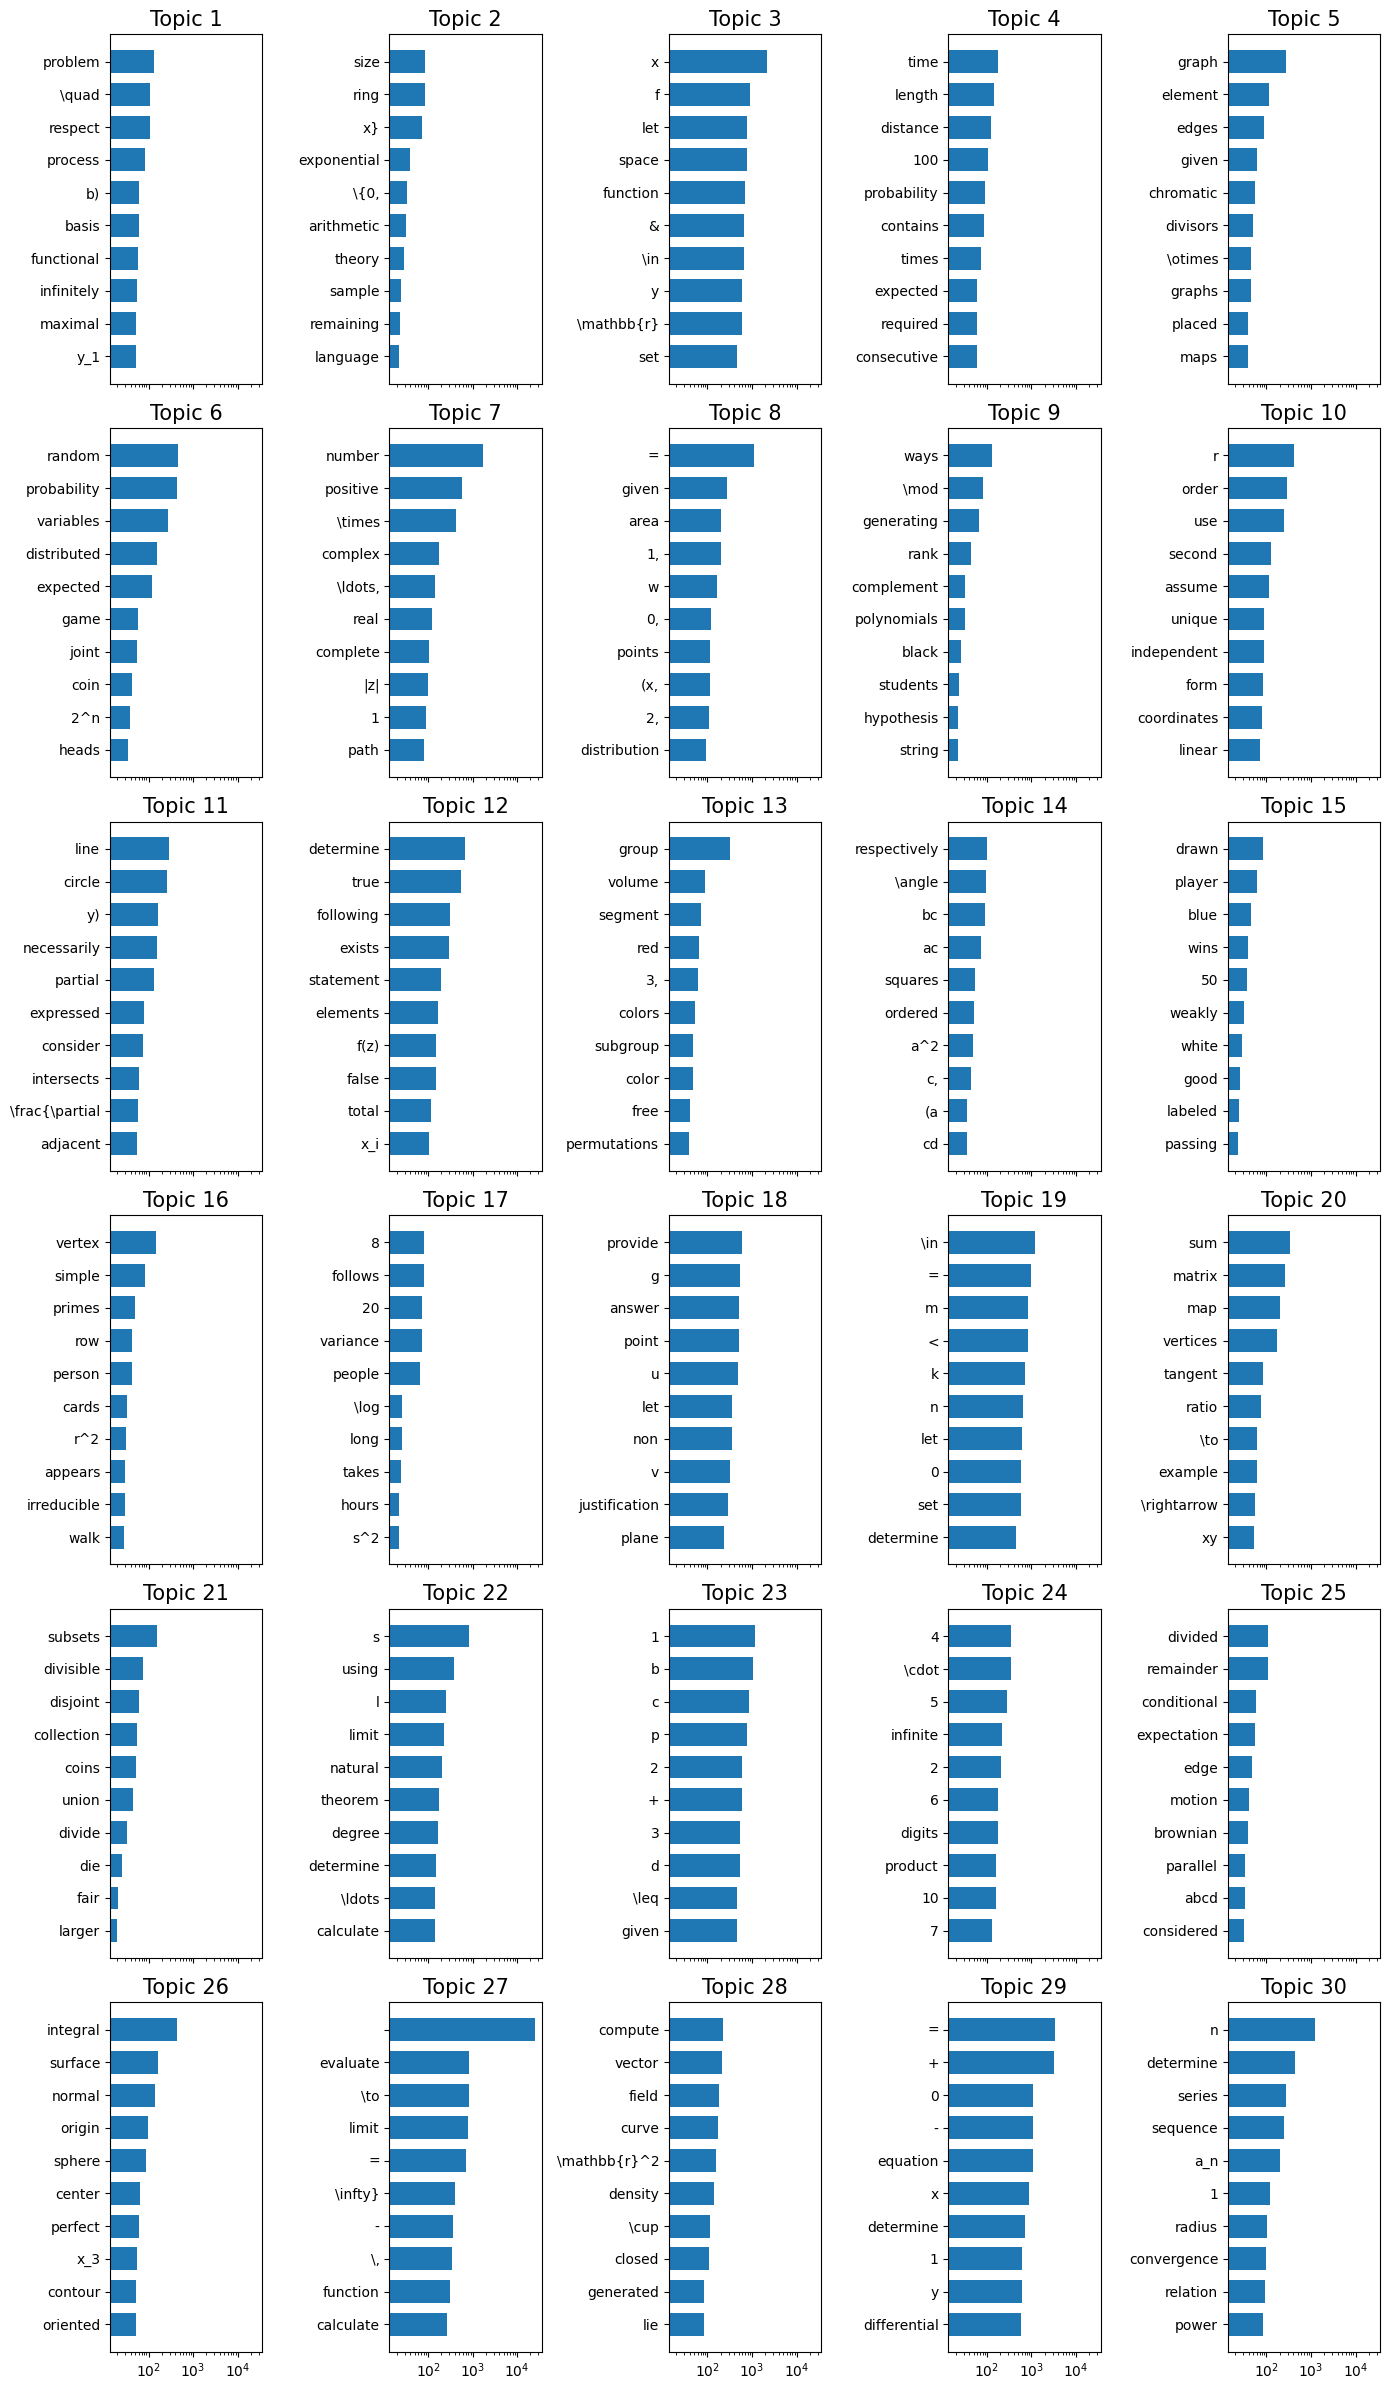

In [70]:
num_words = 10
cols = 5
rows = int(len(lda.components_)/5)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4 * rows), sharex=True)
axes = axes.flatten()
for topic_idx, topic in enumerate(lda.components_):
    top_terms_index = topic.argsort()[:-num_words - 1:-1]
    top_terms = [vocab[i] for i in top_terms_index]
    weights = topic[top_terms_index]
    ax = axes[topic_idx]
    ax.barh(top_terms, weights, height=0.7)
    ax.set_title(f'Topic {topic_idx +1}',fontdict={'fontsize': 15})
    ax.invert_yaxis()
    ax.set_xscale('log')

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.tight_layout()
plt.show()

In [71]:
# Analyse one document in particular

doc = train_clust[6033]
print(doc)

Is the expression \( \pi \cdot a^{\frac{m}{n}} \) always irrational for every choice of natural numbers \( m, n, \) and \( a \)?


In [72]:
doc_vec = vectorizer.transform([doc])[0]
topic_vec = lda.transform(doc_vec)[0]
topic_vec

array([0.06458333, 0.00208333, 0.08035067, 0.00208333, 0.00208333,
       0.00208333, 0.00208333, 0.00208333, 0.00208333, 0.00208333,
       0.00208333, 0.00208333, 0.00208333, 0.00208333, 0.00208333,
       0.00208333, 0.00208333, 0.00208333, 0.00208333, 0.00208333,
       0.00208333, 0.06458333, 0.06971156, 0.06458333, 0.00208333,
       0.00208333, 0.49376586, 0.00208333, 0.11450524, 0.00208333])

In [73]:
sorted_topics = topic_vec.argsort()[::-1]
sorted_prevalence = sorted(topic_vec)[::-1]

In [74]:
# Relevance and top terms for the question for each topic
for i in range(10):
    if sorted_prevalence[i] < .01: break
    topic = sorted_topics[i]
    sorted_terms = np.flip(lda.components_[topic].argsort())
    print (f'{100 * sorted_prevalence[i]:.1f}% Topic {topic}: {" ".join(vocab[i] for i in sorted_terms[:10])}')

49.4% Topic 26:  evaluate \to limit = \infty} - \, function calculate
11.5% Topic 28: = + 0 - equation x determine 1 y differential
8.0% Topic 2: x f let space function & \in y \mathbb{r} set
7.0% Topic 22: 1 b c p 2 + 3 d \leq given
6.5% Topic 23: 4 \cdot 5 infinite 2 6 digits product 10 7
6.5% Topic 21: s using l limit natural theorem degree determine \ldots calculate
6.5% Topic 0: problem \quad respect process b) basis functional infinitely maximal y_1


#### Optimization

In [79]:
from sklearn.model_selection import train_test_split

documents_train, documents_test= train_test_split(train_clust, test_size=0.2, random_state=11)
print('No. training docs:', len(documents_train))
print('No. testing docs:', len(documents_test))

tokenizer = Tokenizer('tree-walk', "allenai/longformer-base-4096")
vectorizer_count = CountVectorizer(tokenizer=tokenizer.parse, lowercase=True,token_pattern=None, stop_words='english', min_df=5, max_df=.5)
vector_documents_train = vectorizer_count.fit_transform(documents_train)
vector_documents_test = vectorizer_count.fit_transform(documents_test)

vocab = vectorizer_count.get_feature_names_out()
print("Vocab length:", len(vocab))

No. training docs: 7200
No. testing docs: 1800
Vocab length: 856


Number of Topics: 5, Perplexity: 18315.9996
Number of Topics: 7, Perplexity: 20341.3343
Number of Topics: 10, Perplexity: 20716.4973
Number of Topics: 12, Perplexity: 22727.2168
Number of Topics: 15, Perplexity: 24432.5021


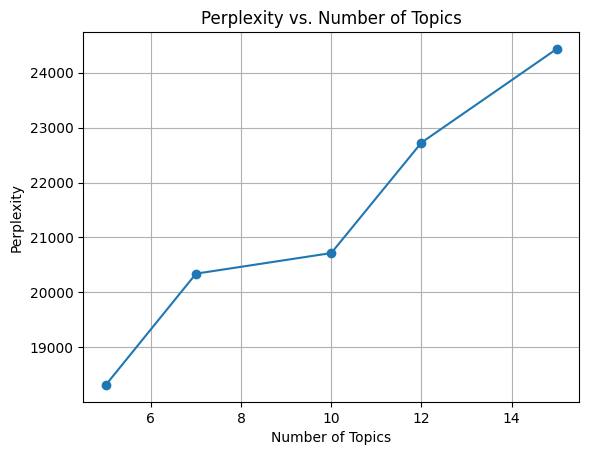

In [81]:
perplexity_values = {}
topic_range = [5, 7, 10, 12, 15]

for n_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=n_topics, verbose=0,
                                    learning_method='online', max_iter=30,
                                    random_state=42)
    lda.fit(vector_documents_train)
    perplexity = lda.perplexity(vector_documents_test)
    perplexity_values[n_topics] = perplexity
    print(f"Number of Topics: {n_topics}, Perplexity: {perplexity:.4f}")

plt.plot(list(perplexity_values.keys()), list(perplexity_values.values()), marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("Perplexity vs. Number of Topics")
plt.grid(True)
plt.show()

## Perform document index on different fields

In [ ]:
# pip install -q python-terrier==0.11.0 #now there is another version but we don't use it

In [ ]:
import os
os.environ["JAVA_HOME"] = "/opt/homebrew/Cellar/openjdk@11/11.0.21/libexec/openjdk.jdk/Contents/Home"
os.environ["JVM_PATH"] = "/opt/homebrew/Cellar/openjdk@11/11.0.26/libexec/openjdk.jdk/Contents/Home/lib/server/libjvm.dylib"

In [ ]:
column_names = train_ds.column_names
print(column_names)

# 2. Initialize PyTerrier (only once)
import pyterrier as pt

# google colab
#if not pt.started():
#  pt.init()

# vs code in mac
if not pt.java.started():
    pt.init()

### Finding "quadratic form" in 'question'

In [ ]:
# 3. Build a corpus iterator over the 'question' field
def get_question_corpus(ds):
    for i, example in enumerate(ds):
        yield {
            'docno': str(i),                          # unique document ID
            'question': example['question']           # only the question text
        }

# 4. Index into a new folder, specifying that we only want the 'question' field
pt_index_path = './terrier_deepmath_questions'
indexer = pt.index.IterDictIndexer(pt_index_path, overwrite=True, meta_reverse=[])
index_ref = indexer.index(
    get_question_corpus(train_ds),
    fields=('question',),
    meta=('docno', 'question')  # store docno + question in the metadata
)

# 5. Load the index and run a TF-IDF retrieval over the 'question' field
index = pt.IndexFactory.of(index_ref)
tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")
results = tfidf.search("quadratic form")
print(results.head(6))

### Perform a 'question' search in only documents with x difficulty

In [ ]:
# Imposto difficulty = 0.0
filtered_ds = [ex for ex in train_ds if float(ex['difficulty']) == 0.0]

# Build a corpus iterator over the 'question' field
def get_question_corpus(ds):
    for i, example in enumerate(ds):
        yield {
            'docno': str(i),                          # unique document ID
            'question': example['question']           # only the question text
        }

# Index into a new folder, specifying that we only want the 'question' field
pt_index_path = './terrier_deepmath_questions'
indexer = pt.index.IterDictIndexer(pt_index_path, overwrite=True, meta_reverse=[])
index_ref = indexer.index(
    get_question_corpus(filtered_ds),
    fields=('question',),
    meta=('docno', 'question')
)

# Load the index and run a TF-IDF retrieval over the 'question' field
index = pt.IndexFactory.of(index_ref)
tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")
query = "quadratic form"
query1 = "quadratic form optimization minimize" #puoi mettere piu parole e funziona
results = tfidf.search(query)
print(results.head(6))

### Finding 'quadratic form' in more fields (NON RIUSCITO)

## Generate embeddings and analyze them

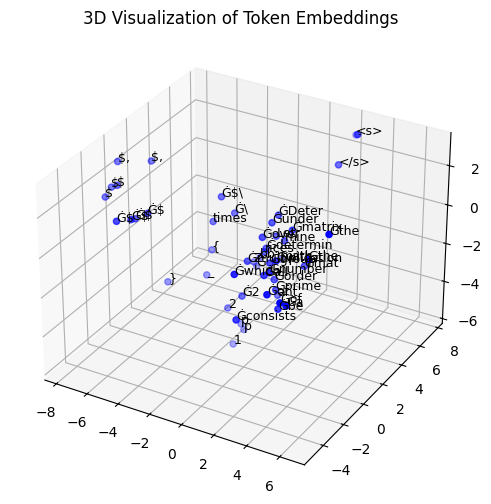

In [ ]:
# TODO: fix! clusterize whole sentences

# Example token IDs (replace with your token IDs)
token_id = token_ids[45]

model = AutoModel.from_pretrained(model_name)

# Convert token IDs to embeddings
input_ids = torch.tensor([token_id])  # Add batch dimension
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: (seq_len, hidden_dim)

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
embeddings_3d = pca.fit_transform(embeddings)

# Visualize in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c='blue', marker='o')

# Annotate tokens
tokens = tokenizer.convert_ids_to_tokens(token_id)
for i, token in enumerate(tokens):
    ax.text(embeddings_3d[i, 0], embeddings_3d[i, 1], embeddings_3d[i, 2], token, fontsize=9)

ax.set_title("3D Visualization of Token Embeddings")
plt.show()

# Training

## M1C: Base model (topic classification)

initial investigation on which classification method works better for this dataset

In [ ]:
# TODO: investigate different tokenizers and fitting performance
# TODO: research if max iter matters (from litterature)
# TODO: try step by step classification (from outer to inner)

fitted: LinearSVC(max_iter=10000)
fitted: SGDClassifier(class_weight='balanced', max_iter=10000)
fitted: SGDClassifier(class_weight='balanced', loss='log_loss', max_iter=10000)
fitted: LogisticRegression(max_iter=1000, n_jobs=-1)
fitted: MultinomialNB()


,model,accuracy,macro_f1
1,SGD-hinge,0.412060,0.330846
0,LinearSVC,0.442211,0.308588
2,SGD-log,0.427136,0.285680
3,LogisticRegression,0.346734,0.124952
4,MultinomialNB,0.170854,0.047981


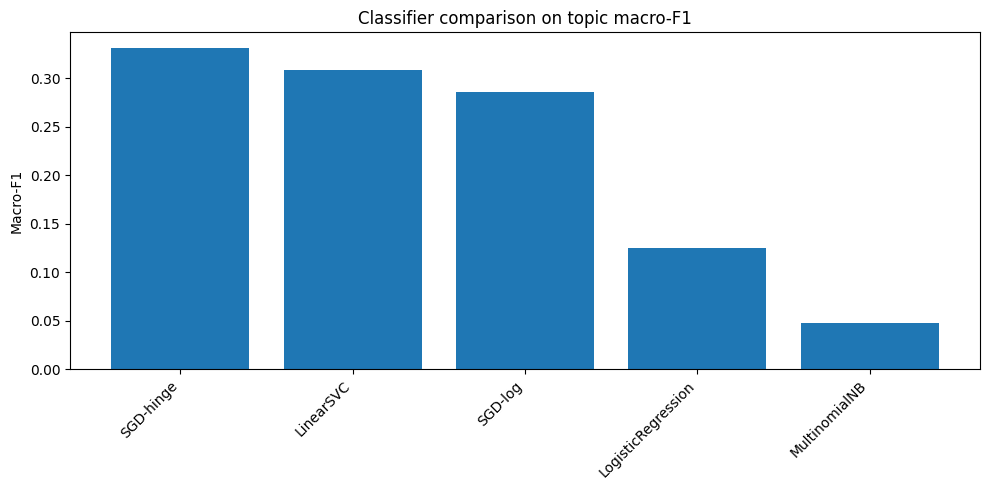

Best model: SGD-hinge
Accuracy: 0.4120603015075377
Macro-F1: 0.33084569782444273
Best model class: <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'>


In [ ]:
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    train_ds_qs, train_ds_tp,
    test_size=0.2, random_state=seed,
    stratify=train_ds_tp
)

# 2. Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test  = le.transform(y_test_raw)

counts = Counter(y_train)
total = len(y_train)

# Inverse‐frequency weights
weights = {cls: total/(len(counts)*cnt) for cls, cnt in counts.items()}

# 3. Select tokenizer
tokenizer = Tokenizer('tree-walk', "allenai/longformer-base-4096")

# 4. Define a suite of classifiers to compare
classifiers = {
    "LinearSVC":             LinearSVC(max_iter=10000),
    "SGD-hinge":             SGDClassifier(loss="hinge", class_weight="balanced", max_iter=10000),
    "SGD-log":               SGDClassifier(loss="log_loss",  class_weight="balanced", max_iter=10000),
    "LogisticRegression":    LogisticRegression(max_iter=1000, n_jobs=-1),
    "MultinomialNB":         MultinomialNB(),
}

classifiers_classes = {
    "LinearSVC":             LinearSVC,
    "SGD-hinge":             SGDClassifier,
    "SGD-log":               SGDClassifier,
    "LogisticRegression":    LogisticRegression,
    "MultinomialNB":         MultinomialNB,
}

vectorizer =  TfidfVectorizer(
    tokenizer=tokenizer.parse,
    lowercase=True,
    token_pattern=None
)
X_train_vectorized =  vectorizer.fit_transform(X_train)
X_test_vectorized =  vectorizer.transform(X_test)

# 5. Train, predict, record metrics
results = []
for name, clf in classifiers.items():
    clf.fit(X_train_vectorized, y_train)
    print("fitted:",clf)
    yp = clf.predict(X_test_vectorized)
    results.append({
        "model":    name,
        "accuracy": accuracy_score(y_test, yp),
        "macro_f1": f1_score(y_test, yp, average="macro")
    })

df = pd.DataFrame(results).sort_values("macro_f1", ascending=False)
display(df)

# 6. Plot macro-F1 for easy comparison
plt.figure(figsize=(10,5))
plt.bar(df["model"], df["macro_f1"])
plt.ylabel("Macro-F1")
plt.xticks(rotation=45, ha="right")
plt.title("Classifier comparison on topic macro-F1")
plt.tight_layout()
plt.show()

# Find the best model based on macro_f1
best_result = max(results, key=lambda x: x["macro_f1"])
best_model_name = best_result["model"]

print(f"Best model: {best_model_name}")
print(f"Accuracy: {best_result['accuracy']}")
print(f"Macro-F1: {best_result['macro_f1']}")

# Retrieve the corresponding classifier from the classifiers dictionary
best_model_class = classifiers_classes[best_model_name]
print(f"Best model class: {best_model_class}")



Tune the best model with optuna

In [ ]:
X       = train_ds_qs
y_raw   = train_ds_tp
le      = LabelEncoder()
y       = le.fit_transform(y_raw)

N_TRIALS = 5

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

from collections import Counter
counts = Counter(y_train)
total  = len(y_train)
n_cls  = len(counts)
weights = {
    cls : total/(n_cls * count)
    for cls, count in counts.items()
}

def objective(trial):
    # TF–IDF params
    ngram_min    = trial.suggest_int("ngram_min", 1, 2)
    ngram_max    = trial.suggest_int("ngram_max", ngram_min, 3)
    max_df       = trial.suggest_float("max_df", 0.5, 1.0)
    min_df       = trial.suggest_int("min_df", 1, 5)
    #max_features = int(trial.suggest_int("max_features", 10_000, 50_000, step=5_000))

    max_iter = 10000
    if best_model_name == "LinearSVC":
        C            = trial.suggest_float("C", 1e-4, 1e2, log=True)
        weight_choice = trial.suggest_categorical("weight_choice", ["none", "custom"])
        if weight_choice == "none":
            class_weight = None
        else:
            class_weight = weights
        loss         = trial.suggest_categorical("loss", ["hinge", "squared_hinge"])
        dual         = True if loss == "hinge" else False
        model = best_model_class(
            C,
            class_weight=class_weight,
            loss=loss,
            dual=dual,
            max_iter=max_iter,
            random_state=seed
        )
    elif best_model_name in ["SGD-hinge", "SGD-log"]:
        loss         = trial.suggest_categorical("loss", ["hinge", "squared_hinge"])
        weight_choice = trial.suggest_categorical("weight_choice", ["none", "custom"])
        if weight_choice == "none":
            class_weight = None
        else:
            class_weight = weights
        model = best_model_class(
            class_weight=class_weight,
            loss=loss,
            max_iter=max_iter,
            random_state=seed
        )
    elif best_model_name == "LogisticRegression":
        model = best_model_class(
            max_iter=max_iter,
            n_jobs = 1
        )
    elif best_model_name == "MultinomialNB":
        model = best_model_class(
        )
    else:
        raise RuntimeError('not impl')


    pipeline = Pipeline([
        ("tfidf", TfidfVectorizer(
             tokenizer=tokenizer.parse,
             lowercase=True,
             token_pattern=None,
             ngram_range=(ngram_min, ngram_max),
             max_df=max_df,
             min_df=min_df,
             #max_features=max_features,
        )),
        ("clf", model)
    ])


    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    scorer = make_scorer(f1_score, average="macro")

    scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=cv, scoring=scorer, n_jobs=1
    )
    return scores.mean()

study = optuna.create_study(direction="maximize", study_name=f"{best_model_name}_tuning")
study.optimize(objective, n_trials=N_TRIALS, timeout=3600)

best_macro_f1 = study.best_value
best_params = study.best_params

print("Best macro-F1:", study.best_value)
print("Best hyperparameters:", study.best_params)

Best macro-F1: 0.17593021108708679
Best hyperparameters: {'ngram_min': 1, 'ngram_max': 2, 'max_df': 0.87356315058997, 'min_df': 3, 'loss': 'hinge', 'weight_choice': 'custom'}


Best macro-F1: 0.22819337166898143
Best hyperparameters: {'ngram_min': 1, 'ngram_max': 2, 'max_df': 0.7832138168654517, 'min_df': 1, 'C': 44.281459120039905, 'weight_choice': 'none', 'loss': 'hinge'}

l'ets fit the model with the found params

In [ ]:
X = train_ds_qs
y_raw = train_ds_tp

X_train, X_test, y_train, y_test = train_test_split(
    X, y_raw, test_size=0.2, random_state=42,
	stratify=y_raw
)

le = LabelEncoder()
y = le.fit_transform(y_raw)

def build_model(model_name):
    max_iter = 10000
    if model_name == "LinearSVC":
        model = best_model_class(
            best_params['C'],
            class_weight=None,
            loss=best_params['loss'],
            max_iter=max_iter,
            random_state=seed
        )
    elif model_name in ["SGD-hinge", "SGD-log"]:
        model = best_model_class(
            class_weight=None,
            loss=best_params['loss'],
            max_iter=max_iter,
            random_state=seed
        )
    elif model_name == "LogisticRegression":
        model = best_model_class(
            max_iter=max_iter,
            n_jobs = 1
        )
    elif model_name == "MultinomialNB":
        model = best_model_class(
        )
    else:
        raise RuntimeError('not impl')
    return model

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        tokenizer=tokenizer.parse,
        lowercase=True,
        token_pattern=None, ngram_range=(best_params['ngram_min'], best_params['ngram_max']), max_df=best_params['max_df'], min_df=best_params['min_df']
    )),
    ("clf", build_model(best_model_name))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.37185929648241206

Classification report:

                                                                                                     precision    recall  f1-score   support

                                         Mathematics -> Algebra -> Abstract Algebra -> Field Theory       0.33      0.25      0.29         4
                                         Mathematics -> Algebra -> Abstract Algebra -> Group Theory       0.55      0.75      0.63         8
                                                Mathematics -> Algebra -> Abstract Algebra -> Other       0.00      0.00      0.00         3
                                          Mathematics -> Algebra -> Abstract Algebra -> Ring Theory       0.50      0.75      0.60         4
                                         Mathematics -> Algebra -> Algebra -> Algebraic Expressions       0.50      0.50      0.50         2
                                    Mathematics -> Algebra -> Algebra -> Equations and Inequalitie

/opt/homebrew/Caskroom/miniconda/base/envs/nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/nlp/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

## M1R: Base model (difficulty regression)

## M1S: Base model (short answer)

## M2: Introduce reasoning

## Comparisons